# Edge Detection

- Ther are 4 reasons for edges
    - surface normal discontinuity -> Sorface orientation is changing which is basically an edge^^
    - depth discontinuity -> A sphere on a table also has an edge because the table is in the distance behind the sphere
    - surface color discontinuity -> Text for example has edges because of the color changing black text on white ground
    - illumination discontiuity -> For example shadows

# Derivative theorem of convolution

By differentiating an image, we find edges in an image. The reason for that is that differentiation means calculating the change of neighbor pixels. One big problem is noice. If we differentiate an image with noice, we also amplify the noice of the image which is bad. We want to get rid of the noice, so we apply convolution (Gaussian filter) on the image.
- Differentiation is convolution and convolution is associativ $ d/dx (f*g) = f * d/dxg $
- We take an image f and apply the gaussian filter g and differentiate after that. BUT, we could also take the gaussian filter, differentiate it and apply it after that to the image f.
- With this technique we get a new mask which we can apply in just one step to the image ->Safe one operation

# How much smothing is ok?

Dont smoth to much because then the egde will "fade away". To scale the guassian filter, we change Sigma.
- As Sigma increases, more pixels are involved in average
- As Sigma increases, image gets more blurred
- As Sigma increases, noice is more effectively suppressed 

# Prewitt Edge Detection
- First we apply an average filter 3x1 [1 1 1]
- Then we apply the derivative mask [1 0 -1]
- To do this in one step, we multiply both masks 3x1 * 1x3 = 3x3 Matrix 
    - [1 0 -1]
    - [1 0 -1]
    - [1 0 -1] <- Filter for X Direction
- We do the same for Y Direction 
    - [1 1 1]
    - [0 0 0]
    - [-1-1-1] <- Filter for Y Direction 

# Sobel Edge Detection
- First we apply an weighted filter 3x1 [1 2 1]
- Then we apply the derivative mask [1 0 -1]
- To do this in one step, we multiply both masks 3x1 * 1x3 = 3x3 Matrix 
    - [1 0 -1]
    - [2 0 -2]
    - [1 0 -1] <- Filter for X Direction
- We do the same for Y Direction 
    - [1 2 1]
    - [0 0 0]
    - [-1-2-1] <- Filter for Y Direction 

# Marr Hildreth Edge Detection

- It first does smothing with Gaussian filter
- After that it applies Laplacian insted of Gradient(Differentiation)
    - Laplacian is the second derivativ in X direction and second derivative in Y direction
- Instead of finding the maxima in the first derivative, we find the zero cossings in the second derivativ (Laplacian)
    - Because if the first derivativ has a maxima (where the change is max) then it needs to be 0 in the second derivative
- Agian we can apply Laplacian to the Gaussian filter to get a new Mask. So we save again one opperation
- BUT
- The Gaussian filter is 2-Dimensional. 
    - We can seperate it into two 1-Dimensional filter 
    - With a 2Dimensional Gaussian filter you have $n^2$ multiplications per pixel
    - What we also could do is to take one dimensinal convolution in x direction and one dimensional convolution in y direction
    - That results in a 2 multiplications per pixel
    
- 
- 
- So in conclusion
- If we keep 2 dimensional Gaussian filter and apply it on Laplace to get a new mask we need $ n^2 $ multiplications (n = number of pixels)
- BUT, if we split the gaussian filter into 1-Dimensional gaussian filter we can do this in 4 convolutions whis is $ 4*n $ multiplications which is still better then $n^2$
- (We take an Image apply the second derivativ of gaussian filter on it in x direction get the result, then apply gaussian filte (no derivativ) in y direction on it. We repeat that thing and apply the second derivativ of gaussian filter on the image in y direction and apply on that result again the gaussian filter in x direction (no derivativ). We add both results and get the same as if we would do the n^2 multiplications but we only need 4*n... (puuuhhhhh)


- Is Laplacian and Guassian separabel?? -> It is not separabelin 2d but in 1d

In [2]:
import numpy as np
import cv2
import math
import time as t
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.mlab as mlab
from random import randint
import copy

print ("OpenCV version :  {0}".format(cv2.__version__))

OpenCV version :  3.1.0


![Separability](images/Separability.jpg)

# Canny Edge Detector
There are three criterions which we want to optimize. -> The aim is to find a filter that fullfills this three criterias pretty well
1. Good Detection: Should be able to find all edges and no wrong edges
2. Good Localisation: Detected Edge should be as close as possible to the edge
3. Singe Response Constraint: Detector returns one point only for each edge point (you can compare it with a good resolution...)
Canny defined this criteria in one function and he came up with the optimal filter. Again there are several steps to apply this filter.
1. Smooth image with a Gaussian filter
2. Compute the derivativ of the filtered image
3. Find the magnitude and orientation of gradient -> All filters before never used the direction information. Laplacian for example gives the same response even if the edge is rotated it is so called "isotropic" (it only detects the zero crossing)
4. Apply "Non-maximum Suppression"
5. Apply "Hysterisis Threshold" -> two thresholds not just one (low AND hight) If an Edge is above the high threshold but intersects the area under the threshold, it will not be "deleted" (if just one pixel of an edge is above threshold, the whole edge will be shown) But it must be above low threshold (between low and high, we consider neighberhod)
- All about Canny Filter -> http://docs.opencv.org/trunk/da/d22/tutorial_py_canny.html

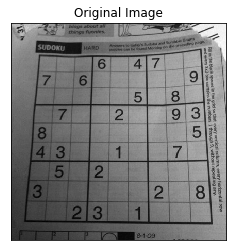

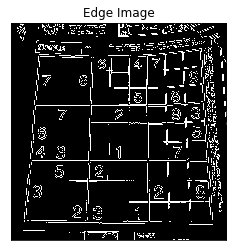

In [18]:
imagecolor = 0
img = cv2.imread('images/Sudoku-original.jpg',imagecolor)
edges = cv2.Canny(img,100,200)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()